## DATA PRE-PROCESSING PART 2
The final Dataset still has many outliers, missing values and categorical values which will be handled in this part

In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('Datasets/final_data.csv', encoding='utf-8')
df

,State Name,Dist Name,Year,Season,Crop,Area,Production,Annual,Mean Max. Tempearure,Mean Min. Tempearure
0,Karnataka,BAGALKOT,1998,Kharif,Arhar/Tur,6154.0,2602.0,795.01,31.708333,20.706667
1,Karnataka,BAGALKOT,1998,Kharif,Bajra,48855.0,52375.0,795.01,31.708333,20.706667
2,Karnataka,BAGALKOT,1998,Kharif,Castor seed,71.0,61.0,795.01,31.708333,20.706667
3,Karnataka,BAGALKOT,1998,Kharif,Cotton(lint),15225.0,22129.0,795.01,31.708333,20.706667
4,Karnataka,BAGALKOT,1998,Kharif,Groundnut,16368.0,7734.0,795.01,31.708333,20.706667
...,...,...,...,...,...,...,...,...,...,...
19586,Karnataka,YADGIR,2014,Summer,Rice,15205.0,35029.0,654.36,33.306667,21.860833
19587,Karnataka,YADGIR,2014,Summer,Sunflower,14.0,5.0,654.36,33.306667,21.860833
19588,Karnataka,YADGIR,2014,Whole Year,Coconut,168.0,1499.0,654.36,33.306667,21.860833
19589,Karnataka,YADGIR,2014,Whole Year,Coriander,1.0,NaN,654.36,33.306667,21.860833


In [3]:
# We add the final dependent attriute i.e the Yield which is Production per area unit
df['Yield'] = df['Production']/df['Area'] * 1000
df

,State Name,Dist Name,Year,Season,Crop,Area,Production,Annual,Mean Max. Tempearure,Mean Min. Tempearure,Yield
0,Karnataka,BAGALKOT,1998,Kharif,Arhar/Tur,6154.0,2602.0,795.01,31.708333,20.706667,422.814430
1,Karnataka,BAGALKOT,1998,Kharif,Bajra,48855.0,52375.0,795.01,31.708333,20.706667,1072.049944
2,Karnataka,BAGALKOT,1998,Kharif,Castor seed,71.0,61.0,795.01,31.708333,20.706667,859.154930
3,Karnataka,BAGALKOT,1998,Kharif,Cotton(lint),15225.0,22129.0,795.01,31.708333,20.706667,1453.464696
4,Karnataka,BAGALKOT,1998,Kharif,Groundnut,16368.0,7734.0,795.01,31.708333,20.706667,472.507331
...,...,...,...,...,...,...,...,...,...,...,...
19586,Karnataka,YADGIR,2014,Summer,Rice,15205.0,35029.0,654.36,33.306667,21.860833,2303.781651
19587,Karnataka,YADGIR,2014,Summer,Sunflower,14.0,5.0,654.36,33.306667,21.860833,357.142857
19588,Karnataka,YADGIR,2014,Whole Year,Coconut,168.0,1499.0,654.36,33.306667,21.860833,8922.619048
19589,Karnataka,YADGIR,2014,Whole Year,Coriander,1.0,NaN,654.36,33.306667,21.860833,NaN


### Correlation Heatmap

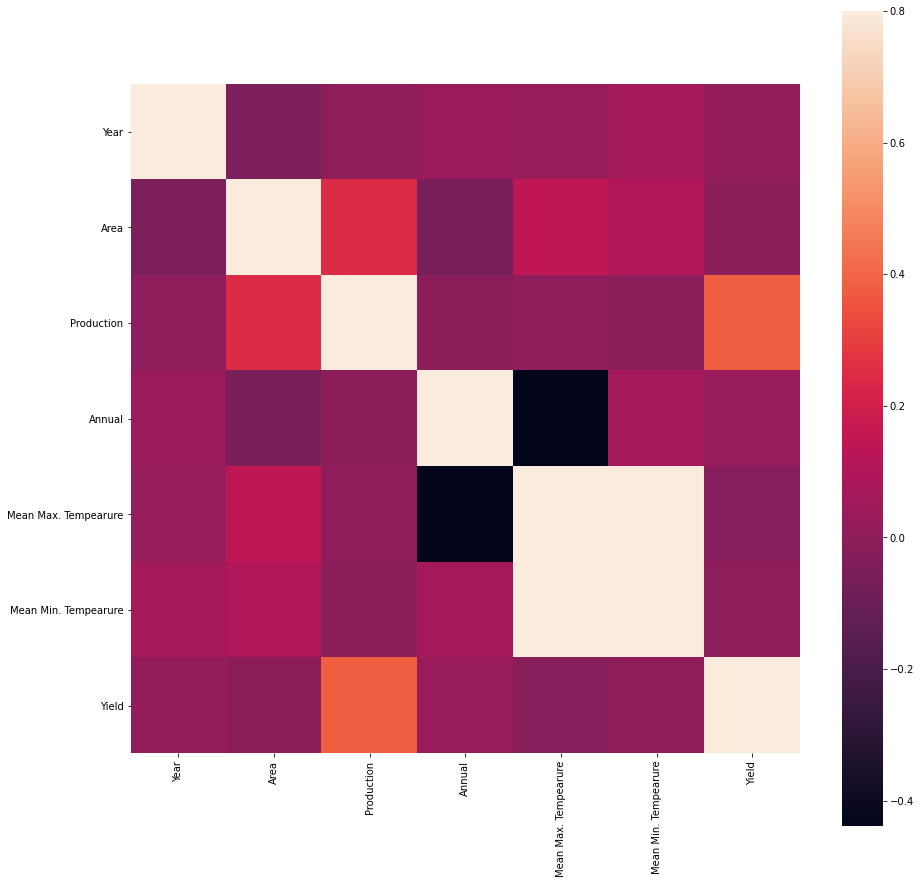

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb

C_mat = df.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

### Encoding Categorical Data

In [5]:
df = df.join(pd.get_dummies(df['Dist Name']))
df = df.join(pd.get_dummies(df['Season']))
df = df.join(pd.get_dummies(df['Crop']))
df

,State Name,Dist Name,Year,Season,Crop,Area,Production,Annual,Mean Max. Tempearure,Mean Min. Tempearure,...,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tobacco,Tomato,Turmeric,Urad,Wheat
0,Karnataka,BAGALKOT,1998,Kharif,Arhar/Tur,6154.0,2602.0,795.01,31.708333,20.706667,...,0,0,0,0,0,0,0,0,0,0
1,Karnataka,BAGALKOT,1998,Kharif,Bajra,48855.0,52375.0,795.01,31.708333,20.706667,...,0,0,0,0,0,0,0,0,0,0
2,Karnataka,BAGALKOT,1998,Kharif,Castor seed,71.0,61.0,795.01,31.708333,20.706667,...,0,0,0,0,0,0,0,0,0,0
3,Karnataka,BAGALKOT,1998,Kharif,Cotton(lint),15225.0,22129.0,795.01,31.708333,20.706667,...,0,0,0,0,0,0,0,0,0,0
4,Karnataka,BAGALKOT,1998,Kharif,Groundnut,16368.0,7734.0,795.01,31.708333,20.706667,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19586,Karnataka,YADGIR,2014,Summer,Rice,15205.0,35029.0,654.36,33.306667,21.860833,...,0,0,0,0,0,0,0,0,0,0
19587,Karnataka,YADGIR,2014,Summer,Sunflower,14.0,5.0,654.36,33.306667,21.860833,...,0,0,1,0,0,0,0,0,0,0
19588,Karnataka,YADGIR,2014,Whole Year,Coconut,168.0,1499.0,654.36,33.306667,21.860833,...,0,0,0,0,0,0,0,0,0,0
19589,Karnataka,YADGIR,2014,Whole Year,Coriander,1.0,NaN,654.36,33.306667,21.860833,...,0,0,0,0,0,0,0,0,0,0


### Dropping Unnecessary Columns

In [6]:
df=df.drop('Dist Name', axis=1)
df = df.drop('Season',axis=1)
df = df.drop('Crop',axis=1)
df = df.drop('Year', axis=1)
df = df.drop('Production', axis=1)
df = df.drop('State Name', axis=1)
df

,Area,Annual,Mean Max. Tempearure,Mean Min. Tempearure,Yield,BAGALKOT,BANGALORE RURAL,BELGAUM,BELLARY,BENGALURU URBAN,...,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tobacco,Tomato,Turmeric,Urad,Wheat
0,6154.0,795.01,31.708333,20.706667,422.814430,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,48855.0,795.01,31.708333,20.706667,1072.049944,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,71.0,795.01,31.708333,20.706667,859.154930,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15225.0,795.01,31.708333,20.706667,1453.464696,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16368.0,795.01,31.708333,20.706667,472.507331,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19586,15205.0,654.36,33.306667,21.860833,2303.781651,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19587,14.0,654.36,33.306667,21.860833,357.142857,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
19588,168.0,654.36,33.306667,21.860833,8922.619048,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19589,1.0,654.36,33.306667,21.860833,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Handling missing values

In [7]:
df = df.fillna(df.mean())

In [9]:
df.to_csv('Datasets/Pre-Processed Data.csv', index=False)